<a href="https://colab.research.google.com/github/saisindhu2698/Fraud-Detection-System/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install kaggle

In [25]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"saisindhumuppaneni","key":"7da8a843bd80cd0b4cf9643ac4d53d59"}'}

In [26]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [27]:
!ls -l ~/.kaggle

total 4
-rw------- 1 root root 74 Jan 30 22:23 kaggle.json


In [28]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]o
error:  invalid response [[n]o]
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('creditcard.csv')

In [32]:
# Data preprocessing
df['normalized_amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
df['day'] = pd.to_datetime(df['Time'], unit='s').dt.day
df['month'] = pd.to_datetime(df['Time'], unit='s').dt.month

In [33]:
# Feature selection
features = ['normalized_amount', 'day', 'month', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
X = df[features]
y = df['Class']

In [34]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [37]:
# Evaluate Random Forest model
rf_pred = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_pred)
rf_cr = classification_report(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

In [38]:
# Evaluate Logistic Regression model
lr_pred = lr_model.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_pred)
lr_cr = classification_report(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

In [39]:
# Display results
print("Random Forest Confusion Matrix:\n", rf_cm)
print("\nRandom Forest Classification Report:\n", rf_cr)
print("\nRandom Forest ROC AUC Score: {:.2f}".format(rf_roc_auc))

print("\nLogistic Regression Confusion Matrix:\n", lr_cm)
print("\nLogistic Regression Classification Report:\n", lr_cr)
print("\nLogistic Regression ROC AUC Score: {:.2f}".format(lr_roc_auc))

Random Forest Confusion Matrix:
 [[56861     3]
 [   21    77]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Random Forest ROC AUC Score: 0.95

Logistic Regression Confusion Matrix:
 [[56855     9]
 [   39    59]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.60      0.71        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Logistic Regression ROC AUC Score: 0.97


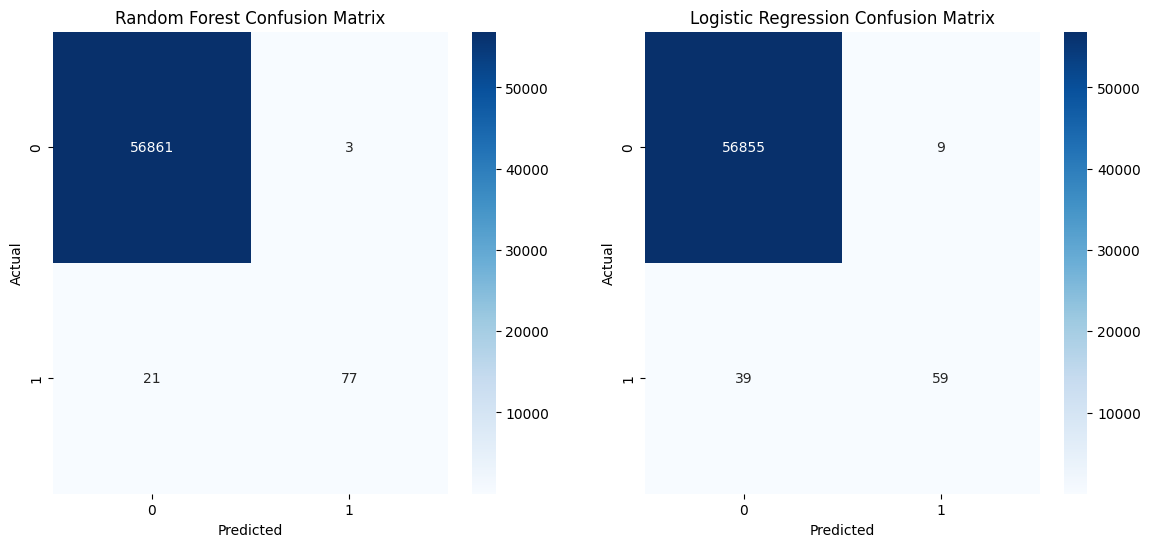

In [40]:
# Visualize confusion matrix
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')

plt.show()